In [1]:
# installing libraries

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# creating dataframe

df = pd.read_csv("/content/Customer Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

Replacing blanks with 0 as tenure is 0 and no total charges are recorded.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.duplicated().sum()

0

In [19]:
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

Converted 0 and 1 values of Senior Citizen to yes/no to make it more easier to understand

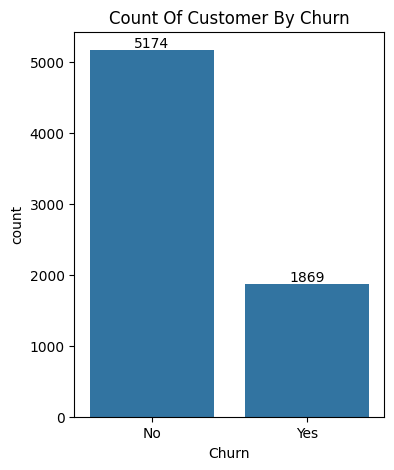

In [51]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "Churn" , data = df)

ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Churn")
plt.show()

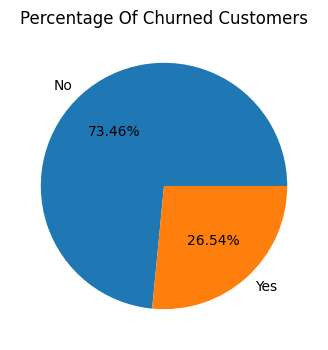

,Churn
Churn,
No,5174
Yes,1869


In [59]:
plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage Of Churned Customers")
plt.show()
gb

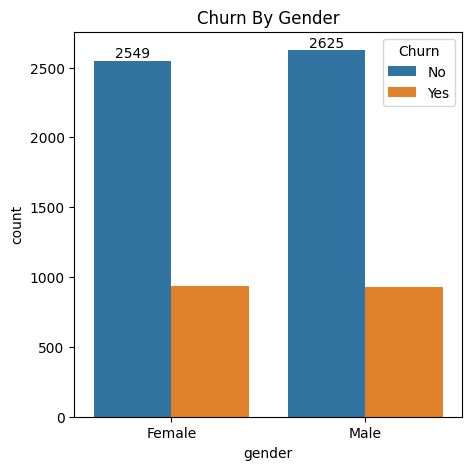

In [53]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "gender" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn By Gender")
plt.show()

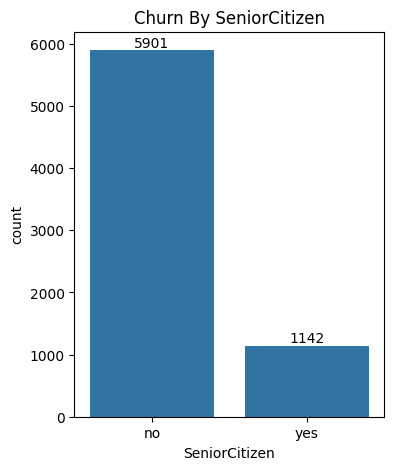

In [98]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "SeniorCitizen" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn By SeniorCitizen")
plt.show()

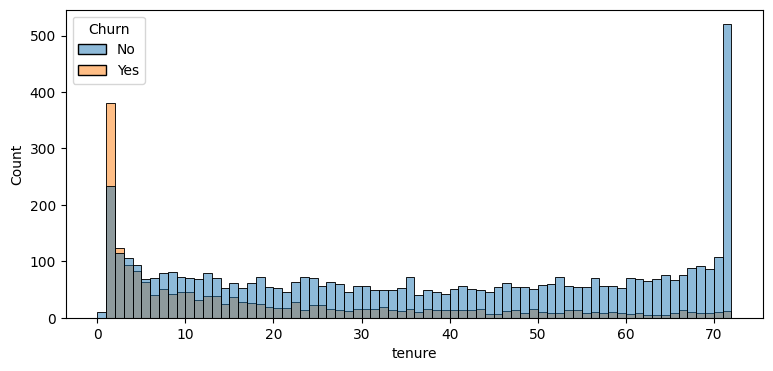

In [63]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

people who have used our services for a long time have stayed and people who have used our serives 1 or 2 months have churned.


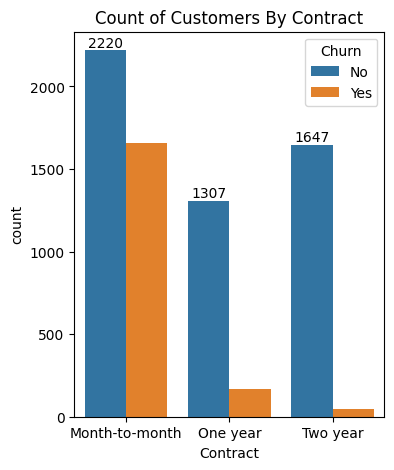

In [66]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "Contract" , data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers By Contract")
plt.show()

people who have month to month contract are likely to churn then from those eho have 1 or 2 years of contract

In [67]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

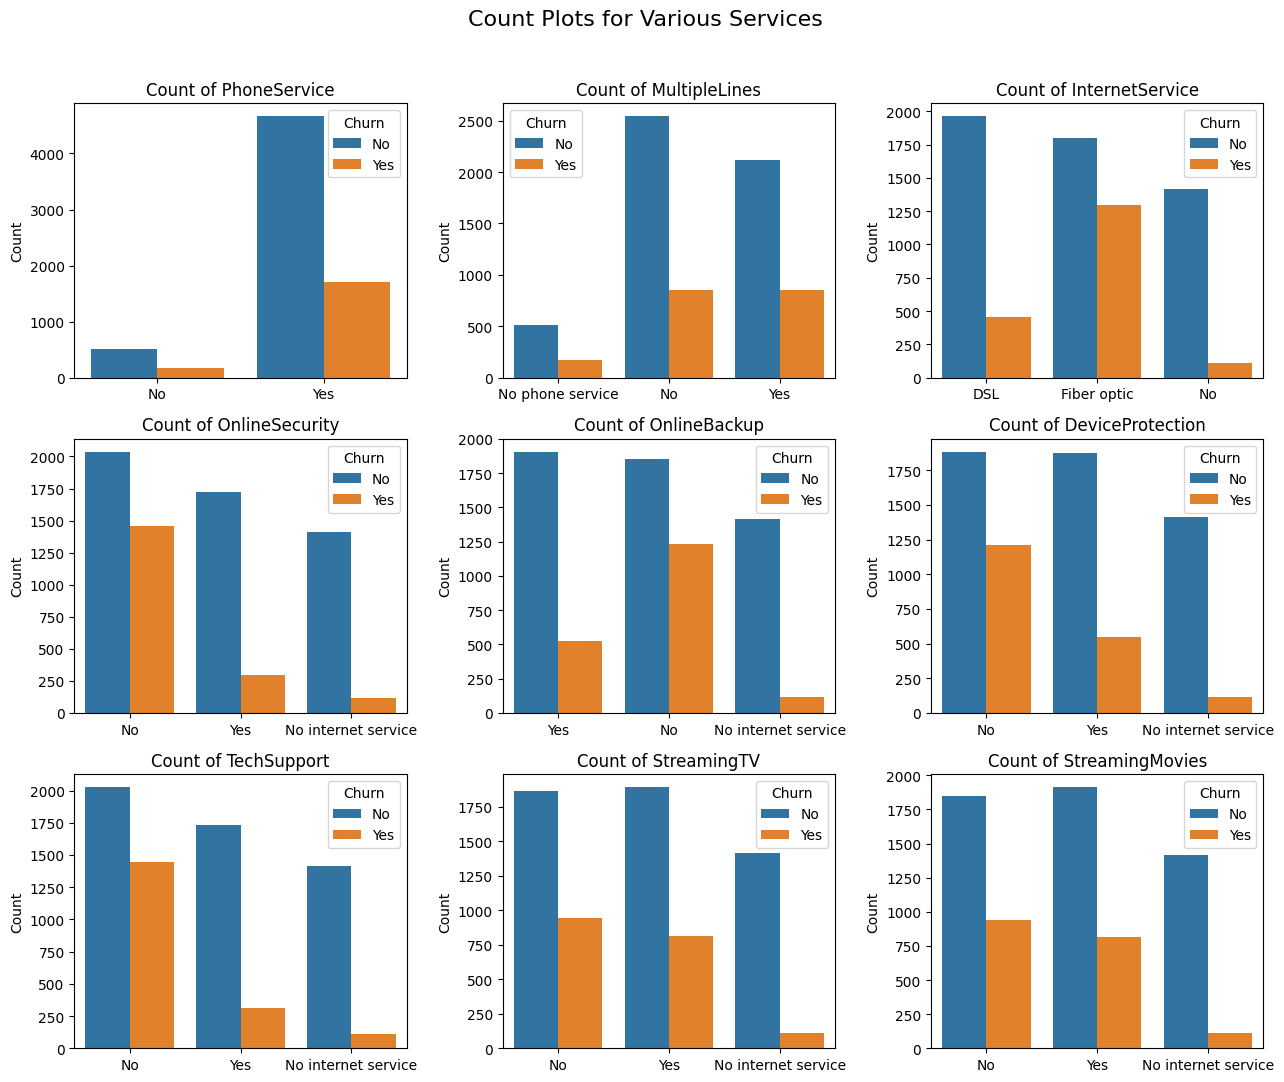

In [81]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(13,11))
fig.suptitle("Count Plots for Various Services", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")  # Remove x-axis label for cleanliness
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


The majority of customers who do not churn tend to have services like phoneservices, interner services, and online security enabled. for services like online backup, tech support and streaming TV, churn rates are noticeably higher than services are not used or are unavailable.

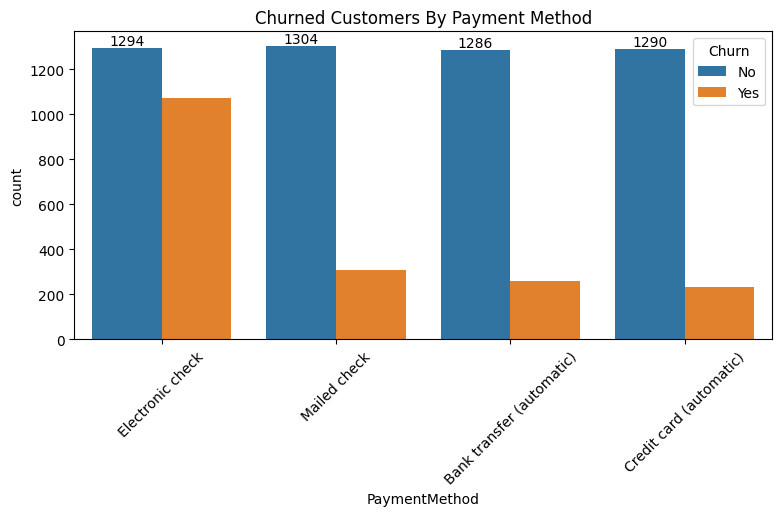

In [94]:
plt.figure(figsize = (9,4))
ax = sns.countplot(x = "PaymentMethod" , data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers By Payment Method")
plt.xticks(rotation = 45)
plt.show()

 Customer is likely to churn when he is using electronic check as a payment method.